In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/Users/I528974/Desktop/InteractiveMap/merge-csv.com__66d53c7bf3835.csv')
df

,Police Station Name,Crime Against Women Index
0,Alipore,Red
1,Amherst Street,Orange
2,Anandapur,Yellow
3,Ballygunge,Green
4,Bansdroni,Red
...,...,...
64,Tollygunge,Red
65,Topsia,Orange
66,Ultadanga,Yellow
67,Watgunge,Green


In [17]:
!pip install folium
!pip install earthpy

In [18]:
!pip install rioxarray

In [19]:
import os 
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

In [20]:
data = et.data.get_data('colorado-flood')
print(data)

/Users/I528974/earth-analytics/data/colorado-flood/.


In [21]:
data

'/Users/I528974/earth-analytics/data/colorado-flood/.'

In [22]:
data = et.data.get_data('Alipore')

KeyError: "Key 'Alipore' not found in earthpy.io.DATA_URLS. Choose one of: 'california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat'"

In [23]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("Hyderabad")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Hyderabad&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

In [24]:
!pip install requests

In [25]:
import requests

r = requests.get(url='https://nominatim.openstreetmap.org/search.php?q=Alipore&format=jsonv2')
data = r.json()
data

[{'place_id': 218283074,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 1172951426,
  'lat': '22.5264928',
  'lon': '88.3323692',
  'category': 'place',
  'type': 'suburb',
  'place_rank': 19,
  'importance': 0.4240545795893716,
  'addresstype': 'suburb',
  'name': 'Alipore',
  'display_name': 'Alipore, Kolkata, West Bengal, 700027, India',
  'boundingbox': ['22.5092116', '22.5425551', '88.3236695', '88.3414551']},
 {'place_id': 218004810,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 10690418857,
  'lat': '22.3392659',
  'lon': '88.285288',
  'category': 'place',
  'type': 'suburb',
  'place_rank': 19,
  'importance': 0.27501,
  'addresstype': 'suburb',
  'name': 'Alipore',
  'display_name': 'Alipore, Bishnupur - I, South 24 Parganas, West Bengal, 743513, India',
  'boundingbox': ['22.3192659', '22.3592659', '88.2652880', '88.3052880']}]

In [36]:
x = int("10")
print(x)

10


In [37]:
def get_lat_lon(location):
    try:
        # Replace spaces with "+" for the query string
        query = location.replace(" ", "+") 
        url = f'https://nominatim.openstreetmap.org/search.php?q={query}&format=jsonv2'
        response = requests.get(url)
        data = response.json()

        # Return the first result's lat and lon if available
        if data and len(data) > 0:
            return float(data[0]['lat']), float(data[0]['lon'])
        else:
            return None, None
    except Exception as e:
        print(f"Error retrieving data for {location}: {e}")
        return None, None
    
df['Latitude'], df['Longitude'] = zip(*df['Police Station Name'].apply(get_lat_lon))
df

Error retrieving data for Lake: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Maidan: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Manicktala: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Metiabruz: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Muchipara: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Nadial: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Narkeldanga: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Netaji Nagar: Expecting value: line 1 column 1 (char 0)
Error retrieving data for New Alipore: Expecting value: line 1 column 1 (char 0)
Error retrieving data for New Market: Expecting value: line 1 column 1 (char 0)
Error retrieving data for North Port: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Panchasayar: Expecting value: line 1 column 1 (char 0)
Error retrieving data for Park Street: Expecting va

,Police Station Name,Crime Against Women Index,Latitude,Longitude
0,Alipore,Red,22.526493,88.332369
1,Amherst Street,Orange,42.939911,-78.838341
2,Anandapur,Yellow,21.333413,86.087215
3,Ballygunge,Green,22.528034,88.365908
4,Bansdroni,Red,22.473586,88.360673
...,...,...,...,...
64,Tollygunge,Red,NaN,NaN
65,Topsia,Orange,NaN,NaN
66,Ultadanga,Yellow,NaN,NaN
67,Watgunge,Green,NaN,NaN


In [38]:
df_filtered = df.dropna(subset=['Latitude', 'Longitude'])  # Drop rows where either Latitude or Longitude is None
df_filtered = df_filtered[(df_filtered['Latitude'].between(22, 23)) & (df_filtered['Longitude'].between(88, 89))]

df_filtered

,Police Station Name,Crime Against Women Index,Latitude,Longitude
0,Alipore,Red,22.526493,88.332369
3,Ballygunge,Green,22.528034,88.365908
4,Bansdroni,Red,22.473586,88.360673
5,Behala,Yellow,22.501572,88.320943
6,Beliaghata,Orange,22.335487,88.452146
7,Beniapukur,Green,22.549075,88.368340
8,Bhowanipur,Red,22.516354,88.873440
9,Bowbazar,Orange,22.570492,88.361560
10,Burrabazar,Yellow,22.581991,88.354169
11,Burtolla,Green,22.592513,88.371143


In [39]:
df_filtered.to_csv('Final.csv')

In [45]:
m = folium.Map(location=[22.526493,88.332369],zoom_start=13)
folium.Marker(location=[22.526493,88.332369],
              popup='Alipore',
              icon=folium.Icon(color='red')).add_to(m)
m

In [52]:
m = folium.Map(location=[22.526493,88.332369],zoom_start=13)

for index,row in df_filtered.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']],
              popup=row['Police Station Name'],
              icon=folium.Icon(color=row['Crime Against Women Index'].lower())).add_to(m)
    
m 

/var/folders/k9/5qgrf_wj2_784m4h139q02d00000gn/T/ipykernel_3430/1278362902.py:6: UserWarning: color argument of Icon should be one of: {'red', 'pink', 'beige', 'purple', 'lightred', 'darkred', 'lightgray', 'cadetblue', 'blue', 'darkpurple', 'gray', 'orange', 'black', 'darkblue', 'green', 'lightblue', 'white', 'darkgreen', 'lightgreen'}.
  icon=folium.Icon(color=row['Crime Against Women Index'].lower())).add_to(m)


In [62]:
crimes = pd.read_csv('CrimesOnWomenData.csv')
crimes

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [63]:
df = crimes[(crimes['State'] == 'WEST BENGAL') |  (crimes['State'] == 'West Bengal')]
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
27,27,WEST BENGAL,2001,709,695,265,954,48,3859,3
61,61,WEST BENGAL,2002,759,694,273,964,34,4069,1
95,95,WEST BENGAL,2003,1002,801,329,1186,71,4948,1
129,129,WEST BENGAL,2004,1475,1018,396,1566,64,6334,12
163,163,WEST BENGAL,2005,1686,1039,446,1572,54,6936,61
197,197,WEST BENGAL,2006,1731,1199,445,1837,63,7414,1
231,231,WEST BENGAL,2007,2106,1590,451,2281,99,9900,5
265,265,WEST BENGAL,2008,2263,1907,451,2396,94,13663,5
299,299,WEST BENGAL,2009,2336,2187,506,1942,108,16112,5
333,333,WEST BENGAL,2010,2311,2764,507,2465,163,17796,8


In [64]:
df = df.drop(['Unnamed: 0','State'],axis=1)
df

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
27,2001,709,695,265,954,48,3859,3
61,2002,759,694,273,964,34,4069,1
95,2003,1002,801,329,1186,71,4948,1
129,2004,1475,1018,396,1566,64,6334,12
163,2005,1686,1039,446,1572,54,6936,61
197,2006,1731,1199,445,1837,63,7414,1
231,2007,2106,1590,451,2281,99,9900,5
265,2008,2263,1907,451,2396,94,13663,5
299,2009,2336,2187,506,1942,108,16112,5
333,2010,2311,2764,507,2465,163,17796,8


In [66]:
df = df.iloc[:-2]
df

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
27,2001,709,695,265,954,48,3859,3
61,2002,759,694,273,964,34,4069,1
95,2003,1002,801,329,1186,71,4948,1
129,2004,1475,1018,396,1566,64,6334,12
163,2005,1686,1039,446,1572,54,6936,61
197,2006,1731,1199,445,1837,63,7414,1
231,2007,2106,1590,451,2281,99,9900,5
265,2008,2263,1907,451,2396,94,13663,5
299,2009,2336,2187,506,1942,108,16112,5
333,2010,2311,2764,507,2465,163,17796,8


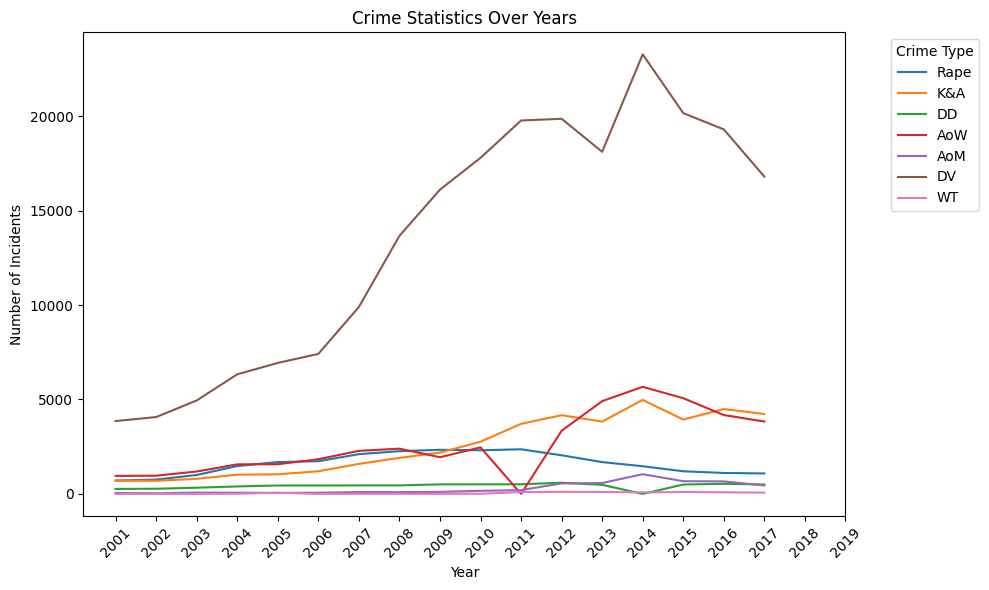

In [67]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Setting 'Year' as the index for easier plotting
df.set_index('Year', inplace=True)

# Plotting the data
df.plot(kind='line', figsize=(10, 6))

# Adding title and labels
plt.title('Crime Statistics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Setting the X-axis to show all years from 2001 to 2019
plt.xticks(ticks=range(2001, 2020), rotation=45)  # Rotating labels for better visibility

# Adding a legend
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
